In [19]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from pylab import rcParams
%matplotlib inline

In [6]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 5000
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
        self.objects_data = None

    def get_ids(self):
        paramz = {
            'offset': self.offset_,
            'limit': self.limit_,
            'sortField':'devId.devShortCleanNm',
            'sortType':'asc',
            'objStatus':'0',
        }
        res = requests.get(url, params=paramz)

        self.objects_data = res.json()
            
    def make_objects_dataframe(self):
        print("Создан DataFrame")
        return pd.DataFrame(self.objects_data.get('data').get('list'))
    
    def get_df_with_objects(self):
        self.get_ids()
        self.objects_data = self.make_objects_dataframe()
        return self.objects_data

In [7]:
url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
object_loader = DomIdLoader()
object_df = object_loader.get_df_with_objects()

Создан DataFrame


In [8]:
object_df

,hobjId,objId,developer,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,...,problemFlag,siteStatus,objGuarantyEscrowFlg,residentialBuildings,rpdNum,pdId,buildType,objStatus,objCommercNm,complexShortName
0,39024,13383,"{'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...",72,г Тюмень,4,20,68,2023-03-31,6296.55,...,NONE,Строящиеся,0,1,72-000095,28105,Жилое,0,NaN,NaN
1,37165,13398,"{'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...",72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,...,NONE,Строящиеся,0,1,72-000097,28141,Жилое,0,NaN,NaN
2,37201,13397,"{'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...",72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6248.51,...,NONE,Строящиеся,0,1,72-000097,28141,Жилое,0,NaN,NaN
3,34754,13399,"{'devId': 306, 'shortName': '2МЕН ГРУПП', 'ful...",72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,...,NONE,Строящиеся,0,0,72-000097,28141,Нежилое,0,NaN,NaN
4,6541,10891,"{'devId': 3006, 'shortName': 'ААК ВОЛОГДААГРОС...",35,"г Вологда, ул Медуницинская, д. 7",16,16,225,2023-03-31,12847.23,...,NONE,Строящиеся,0,1,35-000069,23054,Жилое,0,"Жилой комплекс ""Рафинад""",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,128945,48315,"{'devId': 14786, 'shortName': 'СЗ М-СТРОЙ', 'f...",26,"п Рыздвяный, ул Стадионная, д. 10, литера А",5,5,70,2023-06-30,4079.00,...,NONE,Строящиеся,1,1,26-000792,630478,Жилое,0,"ЖК ""Центральный""",NaN
4996,125941,45320,"{'devId': 12574, 'shortName': 'СЗ М.О.Д', 'ful...",50,"д Радумля, район ММС-2, корпус 3",10,10,216,2023-12-31,7839.04,...,NONE,Строящиеся,1,1,50-003396,563387,Жилое,0,NaN,NaN
4997,122982,42409,"{'devId': 12574, 'shortName': 'СЗ М.О.Д', 'ful...",50,"д Радумля, мкр ММС-2, корпус 9",10,10,180,2023-12-31,6632.73,...,NONE,Строящиеся,1,1,50-003238,471936,Жилое,0,NaN,NaN
4998,118303,37894,"{'devId': 9150, 'shortName': 'СЗ М.СИТИ', 'ful...",78,"г Санкт-Петербург, ул. Глухарская",1,14,1110,2023-09-30,37980.08,...,NONE,Строящиеся,1,1,78-001613,355261,Жилое,0,"ЖК ""Полис Приморский""",NaN


In [13]:
class Saver:
    def __init__(self, object_df):
        self.object_df = object_df

    def save_csv(self):
        self.object_df.to_csv(r'C:\Users\eugen\Desktop\Jupytier_Notebook\object_df_csv.csv')

    def save_xl(self):
        self.object_df.to_excel(r'C:\Users\eugen\Desktop\Jupytier_Notebook\object_df_xl.xlsx')

    def save_pickle(self):
        self.object_df.to_pickle(r'C:\Users\eugen\Desktop\Jupytier_Notebook\object_df_pickle.pkl')
    
    def start(self):
        self.save_csv()
        self.save_xl()
        self.save_pickle()

In [14]:
data_saver = Saver(object_df)
data_saver.start()

In [17]:
class Visualizer:
    def __init__(self, object_df):
        self.object_df = object_df

    def make_plot_sum_square_living(self):
        living_space_sum = self.object_df.groupby('rpdRegionCd').agg({'objSquareLiving': 'sum'}).sort_values('objSquareLiving', ascending=False)
        rcParams['figure.figsize'] = 20,20
        living_space_sum.plot(kind='barh')
        plt.show()
        
    def start_sum(self):
        self.make_plot_sum_square_living()

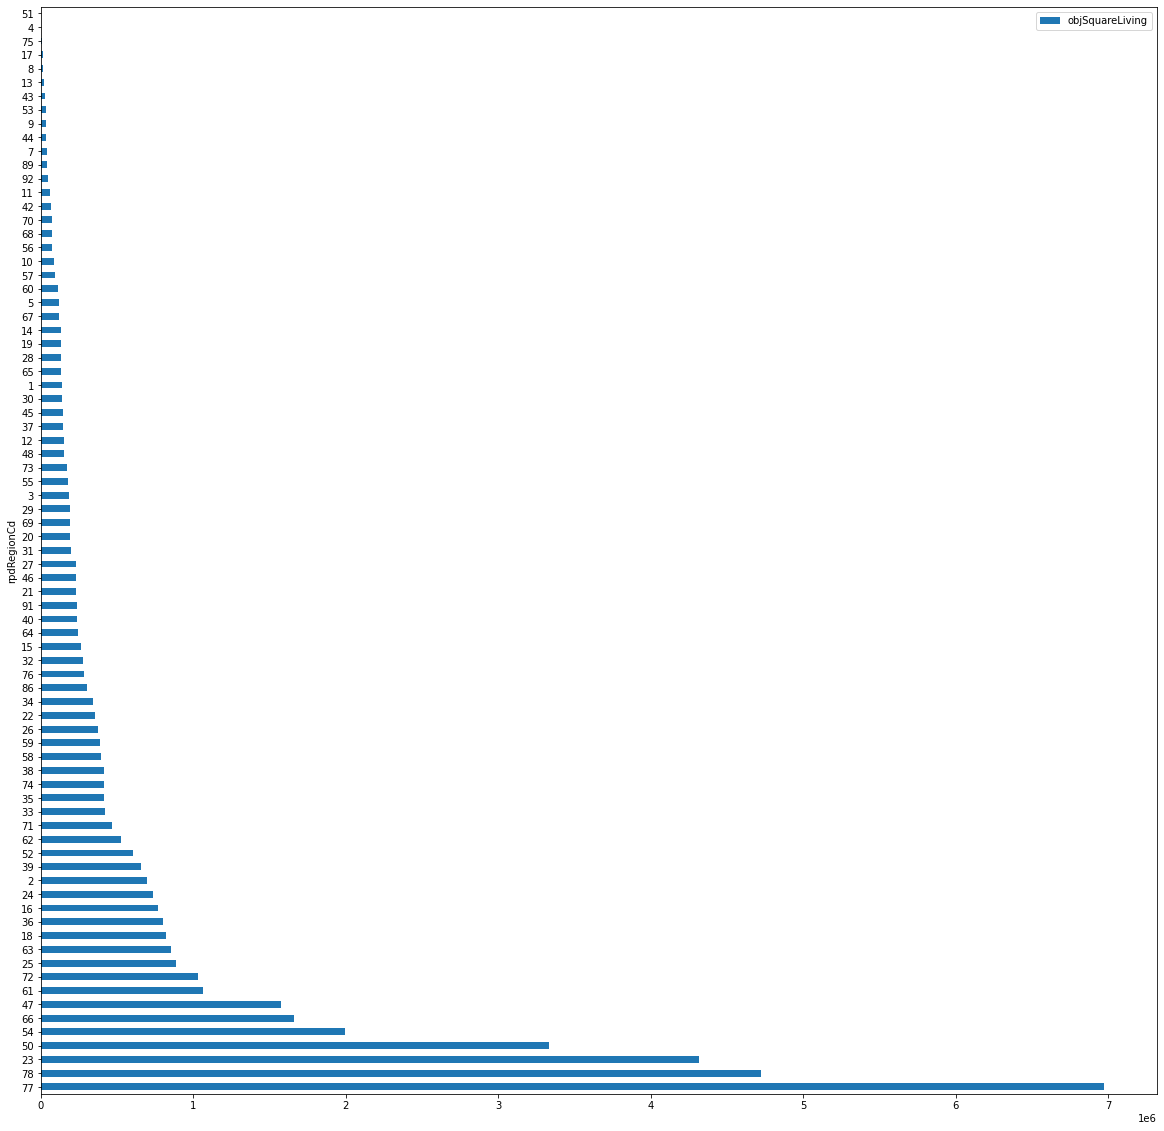

In [20]:
data_visualizer = Visualizer(object_df)
data_visualizer.start_sum()